# Loss Landscape
In this notebook we plot the loss landscape of the models to see how it is efffected by the quantization and see the correlation between some metrics and the robustnmess of the model.

In [1]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from pylab import *
import os
import pickle
import pandas as pd
import numpy as np
from paretoset import paretoset

import loss_landscapes
import loss_landscapes.metrics


# Noise mitigation analysis

In [2]:
df_noise = pd.read_csv('./results/econ/std_noise.csv')
df_aug_noise = pd.read_csv('./results/econ/aug_noise.csv')
df_jreg_noise = pd.read_csv('./results/econ/jreg_noise.csv')

In [3]:
# Vertical concatenation
dataset_df = pd.concat([df_noise, df_aug_noise, df_jreg_noise])
dataset_df.head(5)

precision       emd  noise 5%  noise 10%  noise 15%  noise 20%  batch_size  \
0          2  2.894219  3.624308   3.727183   3.824721   3.896752          32   
1          3  1.428586  2.383232   2.673286   2.896493   3.061683          32   
2          4  1.262199  2.337669   2.675181   2.901907   3.069506          32   
3          5  1.151243  2.568650   2.942064   3.152464   3.278220          32   
4          6  1.162778  2.704586   3.011892   3.180216   3.278355          32   

   learning_rate      type  
0       0.001563  standard  
1       0.001563  standard  
2       0.001563  standard  
3       0.001563  standard  
4       0.001563  standard

In [4]:
noise = 5

### Noise injection hyperparam

In [5]:
df = dataset_df[(dataset_df.type == "standard") | (dataset_df.type == "30% noise injection") | (dataset_df.type == "50% noise injection") | (dataset_df.type == "80% noise injection")]
df = df[(df.batch_size == 64) ]
df.head()
# & (df.precision == 11)

precision       emd  noise 5%  noise 10%  noise 15%  noise 20%  \
10          2  2.925020  3.405338   3.480335   3.554423   3.604026   
11          3  1.534006  2.352603   2.630114   2.834808   2.980485   
12          4  1.255315  2.235527   2.524976   2.715169   2.827949   
13          5  1.203289  2.433102   2.731776   2.865858   2.942910   
14          6  1.191106  2.773940   3.098210   3.233151   3.318527   

    batch_size  learning_rate      type  
10          64       0.001563  standard  
11          64       0.001563  standard  
12          64       0.001563  standard  
13          64       0.001563  standard  
14          64       0.001563  standard

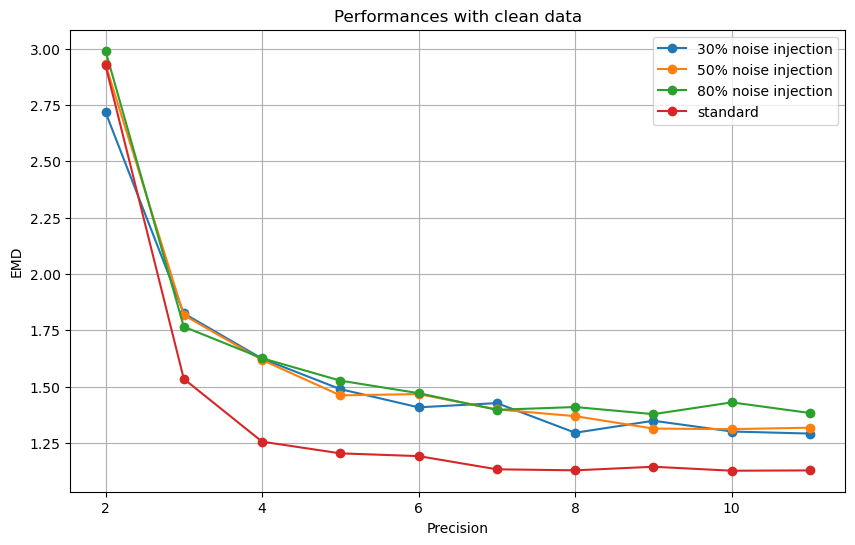

In [6]:
# Plot line graph
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group['emd'], marker='o', label=label)

plt.xlabel('Precision')
plt.ylabel('EMD')
plt.title('Performances with clean data')
plt.legend()
plt.grid(True)
plt.show()

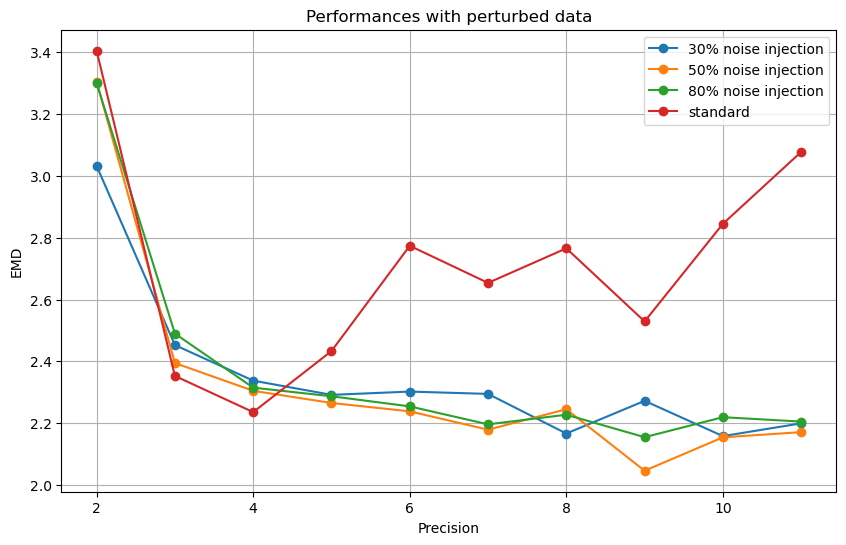

In [7]:
# Plot line graph
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group[f'noise {noise}%'], marker='o', label=label)

plt.xlabel('Precision')
plt.ylabel('EMD')
plt.title('Performances with perturbed data')
plt.legend()
plt.grid(True)
plt.show()

### JR hyperparameter

In [8]:
df = dataset_df[(dataset_df.type == "standard") | (dataset_df.type == "lambda JR 0.1") | (dataset_df.type == "lambda JR 0.01") | (dataset_df.type == "lambda JR 0.001") | (dataset_df.type == "lambda JR 0.0001")]
df = df[(df.batch_size == 64)]
df.head(10)

precision       emd  noise 5%  noise 10%  noise 15%  noise 20%  \
10          2  2.925020  3.405338   3.480335   3.554423   3.604026   
11          3  1.534006  2.352603   2.630114   2.834808   2.980485   
12          4  1.255315  2.235527   2.524976   2.715169   2.827949   
13          5  1.203289  2.433102   2.731776   2.865858   2.942910   
14          6  1.191106  2.773940   3.098210   3.233151   3.318527   
15          7  1.132471  2.653783   3.136153   3.381215   3.536070   
16          8  1.127975  2.765635   3.097714   3.249281   3.343111   
17          9  1.143858  2.529091   2.780903   2.911227   3.000834   
18         10  1.126236  2.845030   3.134403   3.286262   3.404521   
19         11  1.127617  3.077804   3.379361   3.544816   3.663986   

    batch_size  learning_rate      type  
10          64       0.001563  standard  
11          64       0.001563  standard  
12          64       0.001563  standard  
13          64       0.001563  standard  
14          64       0.001563  standard  
15          64       0.001563  standard  
16          64       0.001563  standard  
17          64       0.001563  standard  
18          64       0.001563  standard  
19          64       0.001563  standard

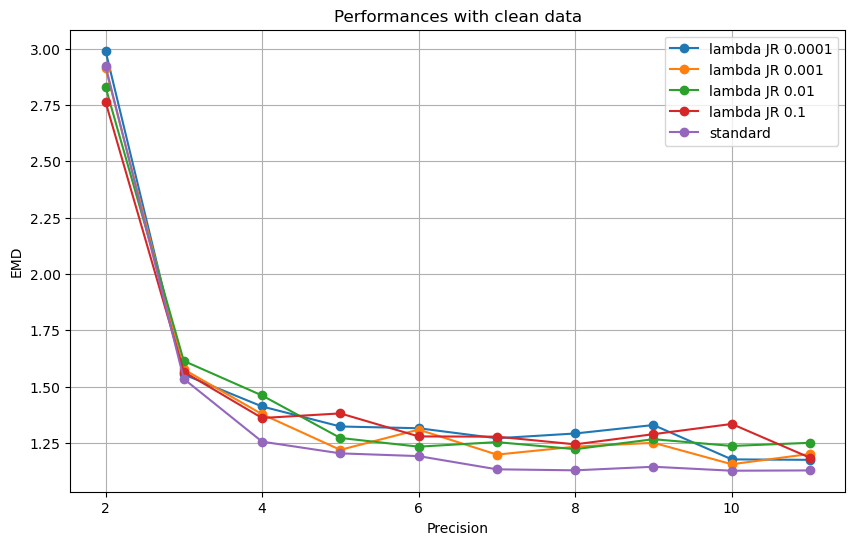

In [9]:
# Plot line graph
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group['emd'], marker='o', label=label)

plt.xlabel('Precision')
plt.ylabel('EMD')
plt.title('Performances with clean data')
plt.legend()
plt.grid(True)
plt.show()

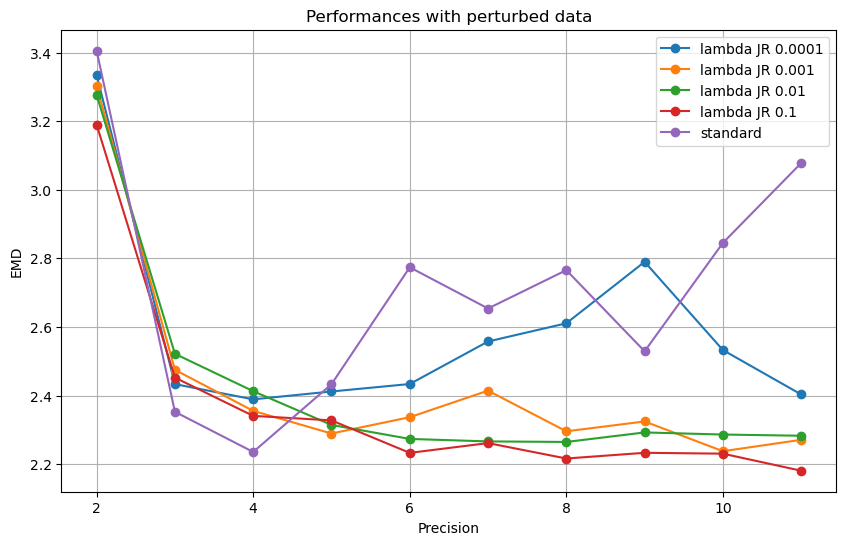

In [10]:
# Plot line graph
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group[f'noise {noise}%'], marker='o', label=label)

plt.xlabel('Precision')
plt.ylabel('EMD')
plt.title('Performances with perturbed data')
plt.legend()
plt.grid(True)
plt.show()

## Effect of pruning

In [11]:
df = pd.read_csv('./results/econ/prune_noise.csv')
# df = df[df != -1].dropna()
df = df[df['batch_size'] == 64]

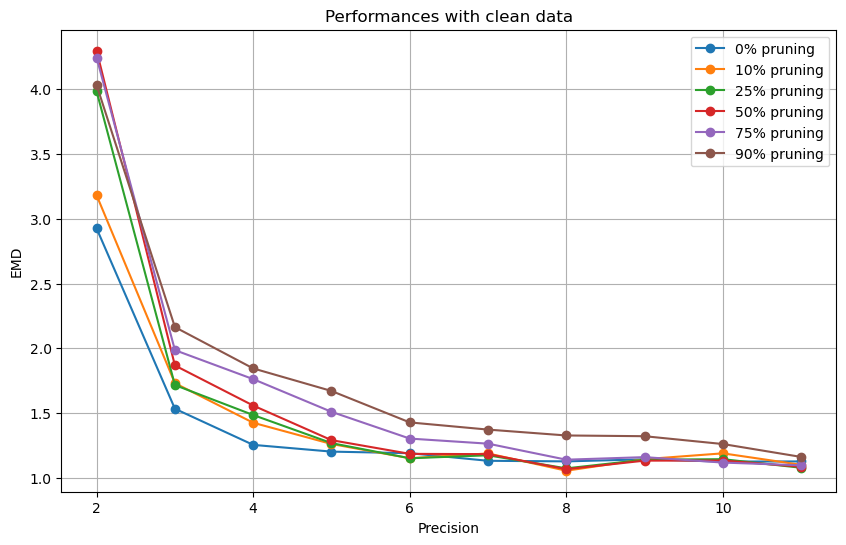

In [12]:
# Plot line graph
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group[f'emd'], marker='o', label=label)

plt.xlabel('Precision')
plt.ylabel('EMD')
plt.title('Performances with clean data')
plt.legend()
plt.grid(True)
plt.show()

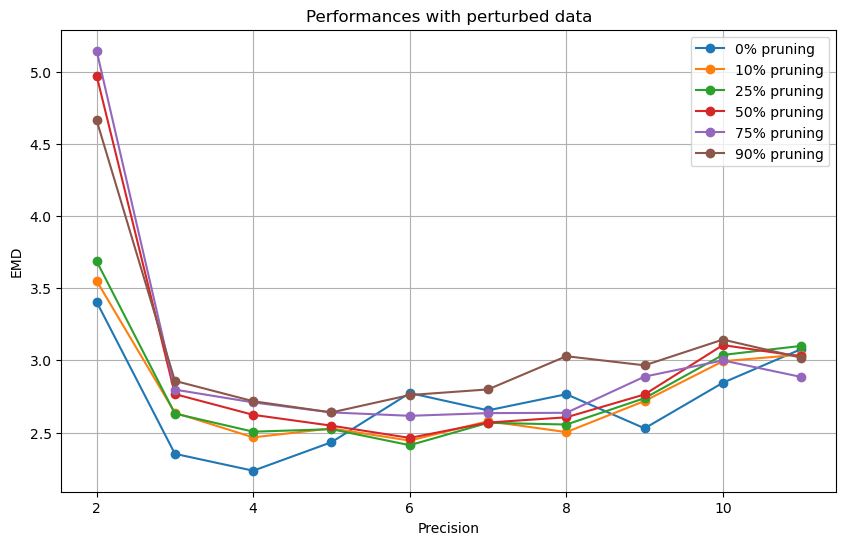

In [13]:
# Plot line graph
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group['noise 5%'], marker='o', label=label)
plt.xlabel('Precision')
plt.ylabel('EMD')
plt.title('Performances with perturbed data')
plt.legend()
plt.grid(True)
plt.show()

### CKA

In [14]:
df = pd.read_csv('./results/econ/prune_cka.csv')
df = df[df != -1].dropna()
df.head()

precision       cka  batch_size  learning_rate        type
0          2  0.618441         512       0.001563  0% pruning
1          3  0.834716         512       0.001563  0% pruning
2          4  0.773100         512       0.001563  0% pruning
3          5  0.802065         512       0.001563  0% pruning
4          6  0.826878         512       0.001563  0% pruning

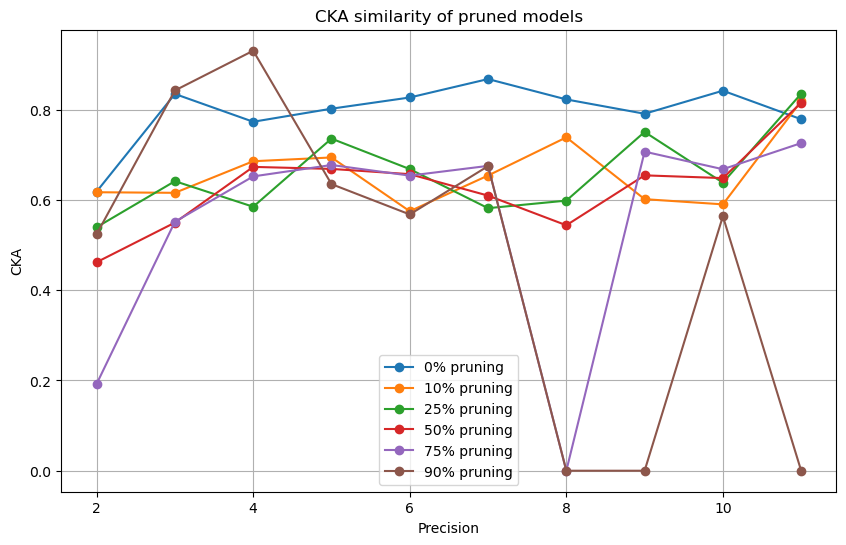

In [15]:
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group['cka'], marker='o', label=label)
plt.xlabel('Precision')
plt.ylabel('CKA')
plt.title('CKA similarity of pruned models')
plt.legend()
plt.grid(True)
plt.show()

### Neural efficiency

In [16]:
df = pd.read_csv('./results/econ/prune_neural_efficiency.csv')
df = df[df != -1].dropna()
df.head()

precision  network efficiency  batch_size  learning_rate        type
0          2            0.148950         512       0.001563  0% pruning
1          3            0.651075         512       0.001563  0% pruning
2          4            0.568298         512       0.001563  0% pruning
3          5            0.472234         512       0.001563  0% pruning
4          6            0.353126         512       0.001563  0% pruning

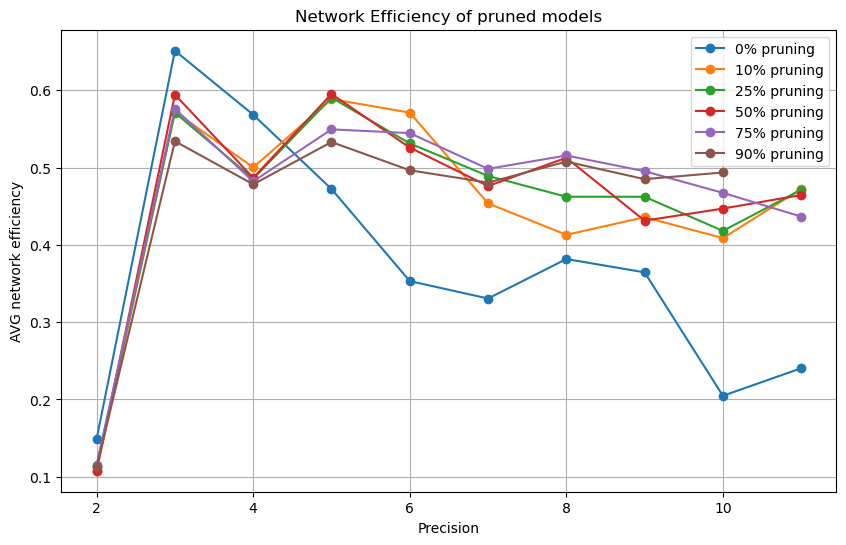

In [17]:
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group['network efficiency'], marker='o', label=label)
plt.xlabel('Precision')
plt.ylabel('AVG network efficiency')
plt.title('Network Efficiency of pruned models')
plt.legend()
plt.grid(True)
plt.show()

### Hessian

In [18]:
df = pd.read_csv('./results/econ/prune_hessian.csv')
df = df[df != -1].dropna()
df.head()

precision  top eigenvalue     trace  batch_size  learning_rate        type
0          2        1.663747  4.119048         512       0.001563  0% pruning
1          3        1.774624  4.398394         512       0.001563  0% pruning
2          4        2.095729  4.721868         512       0.001563  0% pruning
3          5        2.209294  4.447736         512       0.001563  0% pruning
4          6        2.487197  4.840581         512       0.001563  0% pruning

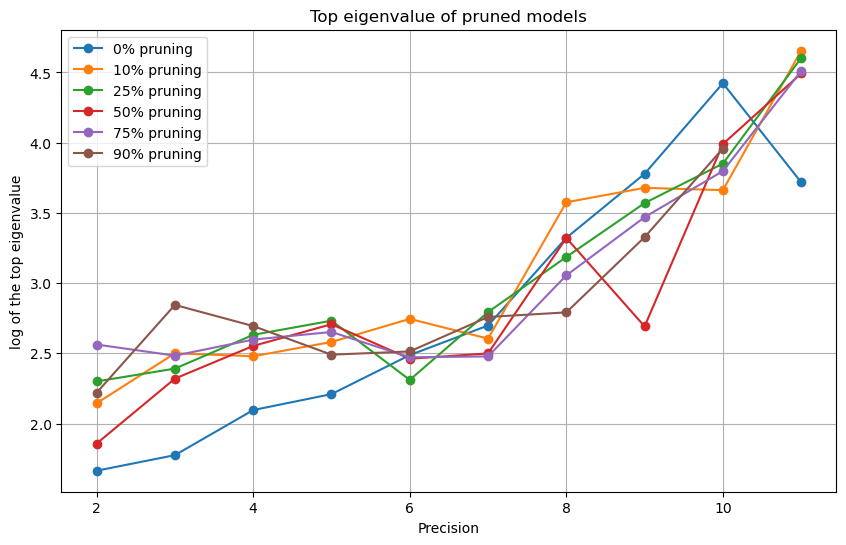

In [19]:
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group['top eigenvalue'], marker='o', label=label)
plt.xlabel('Precision')
plt.ylabel('log of the top eigenvalue')
plt.title('Top eigenvalue of pruned models')
plt.legend()
plt.grid(True)
plt.show()

## Pruning + Jacobian Regularization

In [20]:
df = pd.read_csv('./results/econ/jprune_noise.csv')
# df = df[df != -1].dropna()
df = df[df['batch_size'] == 64]

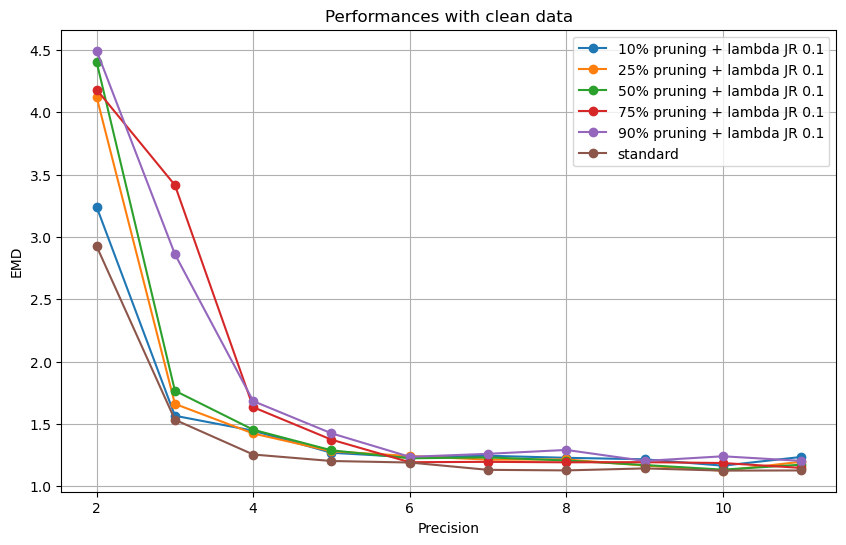

In [21]:
# Plot line graph
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group[f'emd'], marker='o', label=label)

plt.xlabel('Precision')
plt.ylabel('EMD')
plt.title('Performances with clean data')
plt.legend()
plt.grid(True)
plt.show()

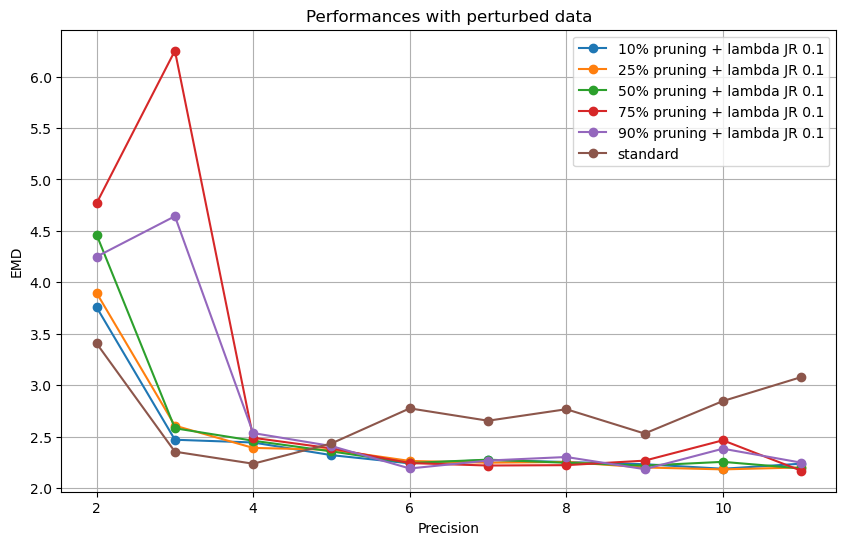

In [22]:
# Plot line graph
plt.figure(figsize=(10, 6))
for label, df_group in df.groupby('type'):
    plt.plot(df_group['precision'], df_group['noise 5%'], marker='o', label=label)
plt.xlabel('Precision')
plt.ylabel('EMD')
plt.title('Performances with perturbed data')
plt.legend()
plt.grid(True)
plt.show()

# Correlation between robustness and metrics

## ECON

Build the dataset by merging all the analysis

In [23]:
df_noise = pd.read_csv('./results/econ/noise.csv')
df_cka = pd.read_csv('./results/econ/cka.csv')
df_fisher = pd.read_csv('./results/econ/fisher.csv')
df_neural_efficiency = pd.read_csv('./results/econ/neural_efficiency.csv')
df_hessian = pd.read_csv("./results/econ/hessian.csv")

In [24]:
df_cka = df_cka[['precision', 'batch_size', 'learning_rate', 'avg_cka']]
df_fisher = df_fisher[['precision', 'batch_size', 'learning_rate', 'avg_EF']]
df_neural_efficiency = df_neural_efficiency[['precision', 'batch_size', 'learning_rate', 'net_efficiency']]
df_hessian = df_hessian[['precision', 'batch_size', 'learning_rate', 'trace', 'eigenvalue']]
dataset_df = pd.merge(df_noise, df_cka, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_fisher, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_neural_efficiency, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_hessian, on=['precision', 'batch_size', 'learning_rate'])
dataset_df.head(1)

precision        emd   noise 5%  noise 10%  noise 15%  noise 20%  \
0          2  13.756807  13.756808  13.756808  13.756808  13.756808   

   batch_size  learning_rate  avg_cka  avg_EF  net_efficiency  trace  \
0          16            0.1      0.0     0.0        0.005529    0.0   

   eigenvalue  
0         0.0

Apply modification to some columns:

In [25]:
dataset_df['trace'] = dataset_df['trace'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['avg_EF'] = dataset_df['avg_EF'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['eigenvalue'] = dataset_df['eigenvalue'].apply(lambda x: np.log10(x) if x > 0 else x)

In [26]:
dataset_df.to_csv('./results/econ/dataset.csv', index=False)
# dataset_df = dataset_df[~dataset_df['precision'].isin([2])]

In [27]:
dataset_df.drop(columns=['noise 10%', 'noise 15%', 'noise 20%', 'avg_EF', ], inplace=True)
# sns.pairplot(dataset_df, corner=True)
# plt.show()

In [28]:
correlation_matrix = dataset_df.corr()

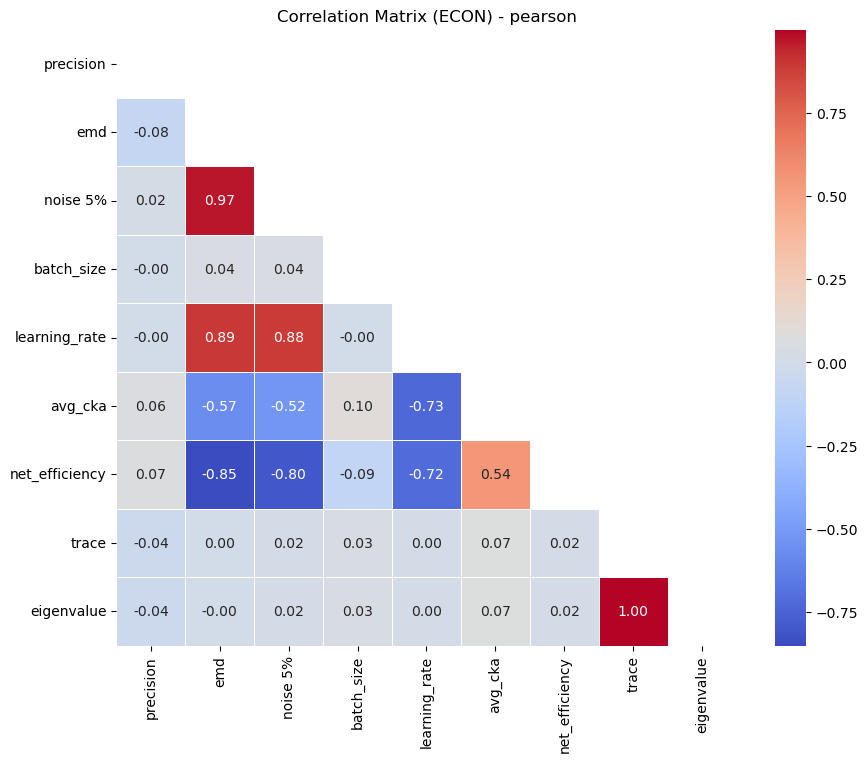

In [29]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (ECON) - pearson')
plt.show()

Check the logarithmic correlation:

In [30]:
correlation_matrix = dataset_df.corr(method='spearman')

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix (ECON) - spearman')
# plt.show()

In [31]:
correlation_matrix = dataset_df.corr(method='kendall')

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix (ECON) - kendall')
# plt.show()

## RN08

In [32]:
df_noise = pd.read_csv('./results/rn08/noise.csv')
# df_cka = pd.read_csv('./results/rn08/cka.csv')
df_fisher = pd.read_csv('./results/rn08/fisher.csv')
df_neural_efficiency = pd.read_csv('./results/rn08/neural_efficiency.csv')
df_hessian = pd.read_csv("./results/rn08/hessian.csv")

In [33]:
df_cka = df_cka[['precision', 'batch_size', 'learning_rate', 'avg_cka']]
df_fisher = df_fisher[['precision', 'batch_size', 'learning_rate', 'avg_EF']]
df_neural_efficiency = df_neural_efficiency[['precision', 'batch_size', 'learning_rate', 'net_efficiency']]
df_hessian = df_hessian[['precision', 'batch_size', 'learning_rate', 'trace', 'eigenvalue']]
dataset_df = pd.merge(df_noise, df_cka, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_fisher, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_neural_efficiency, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_hessian, on=['precision', 'batch_size', 'learning_rate'])
dataset_df.head(1)

precision  accuracy  noise accuracy  batch_size  learning_rate   avg_cka  \
0          2  0.578404              -1         512       0.001563  0.618441   

                                              avg_EF  net_efficiency  trace  \
0  {'EF_trace_w': array([10.528871  ,  1.4250257 ...             NaN      0   

   eigenvalue  
0           0

In [34]:
dataset_df['trace'] = dataset_df['trace'].apply(lambda x: np.log10(x) if x > 0 else x)
# dataset_df['avg_EF'] = dataset_df['avg_EF'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['eigenvalue'] = dataset_df['eigenvalue'].apply(lambda x: np.log10(x) if x > 0 else x)

In [35]:
dataset_df.head(5)

precision  accuracy  noise accuracy  batch_size  learning_rate   avg_cka  \
0          2  0.578404              -1         512       0.001563  0.618441   
1          3  0.721540              -1         512       0.001563  0.834716   
2          4  0.728237              -1         512       0.001563  0.773100   
3          5  0.790458              -1         512       0.001563  0.802065   
4          6  0.790737              -1         512       0.001563  0.826878   

                                              avg_EF  net_efficiency  trace  \
0  {'EF_trace_w': array([10.528871  ,  1.4250257 ...             NaN      0   
1  {'EF_trace_w': array([37.1246    ,  6.407062  ...             NaN      0   
2  {'EF_trace_w': array([108.43793  ,  12.0982065...             NaN      0   
3  {'EF_trace_w': array([109.34575   ,  14.747021...             NaN      0   
4  {'EF_trace_w': array([180.1349   ,  19.149055 ...             NaN      0   

   eigenvalue  
0           0  
1           0  
2           0  
3           0  
4           0

In [36]:
dataset_df.to_csv('./results/rn08/dataset.csv', index=False)


In [37]:
#sns.pairplot(dataset_df, corner=True)
#plt.show()

In [38]:
correlation_matrix = dataset_df.corr()

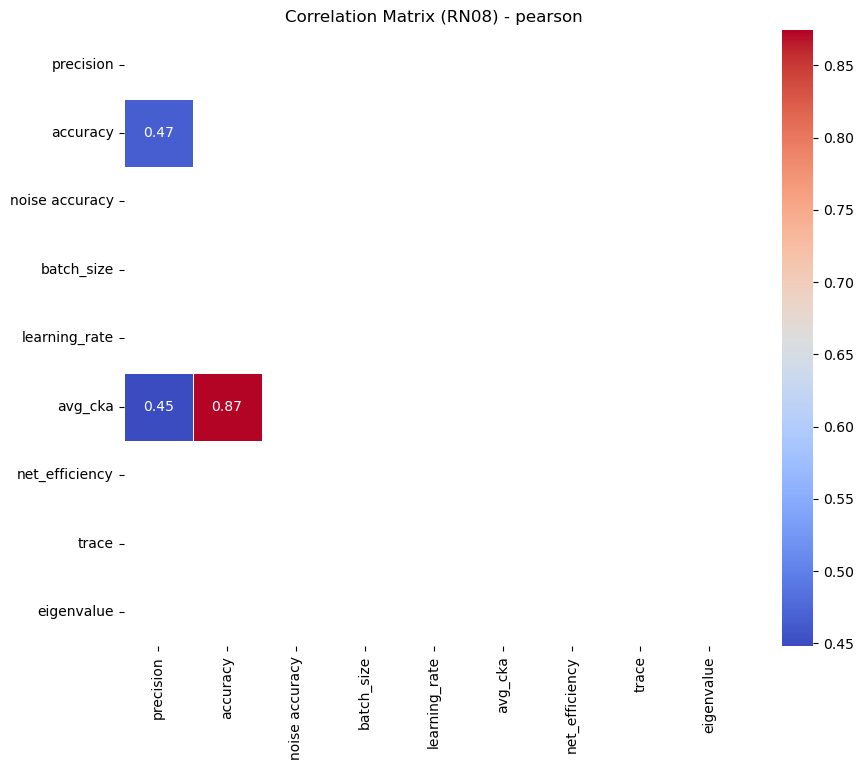

In [39]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (RN08) - pearson')
plt.show()

# Effect of the quantization on the loss landscapes

In [40]:
DATA_PATH = '/data/tbaldi/work/checkpoint/'

In [41]:
def get_econ_loss_landscapes(batch_size, 
                        learning_rate, 
                        precision,
                        size, 
                        normalization,
                        steps, 
                        distance,
                        j_reg=0.0,
                        aug_percentage=0.0):
    '''
    Get the value of the Neural Efficiency
    '''
    # path to the directory
    if j_reg > 0:
        dir_name = f'bs{batch_size}_lr{learning_rate}/ECON_JREG_{precision}b/{size}/'
        file_name = f'plot_jreg_{j_reg}'
    elif aug_percentage > 0:
        dir_name = f'bs{batch_size}_lr{learning_rate}/ECON_AUG_{precision}b/{size}/'
        file_name = f'plot_aug_{aug_percentage}'
    else:
        dir_name = f'bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}/'
        file_name = f'plot_{normalization}_{steps}_{distance}'
    path = os.path.join(
        DATA_PATH, 
        dir_name,
        f"{file_name}.pkl"
    )
    try:
        f = open(path, "rb")
        data = pickle.load(f)
        f.close()
    except:
        print(path + ' Not found!')
        return False
    
    return data[file_name]
    
def get_rn08_loss_landscapes(batch_size, 
                             learning_rate, 
                             precision, 
                             normalization,
                             steps, 
                             distance):
    '''
    Get the value of the Neural Efficiency
    '''
    # path to the directory
    path = os.path.join(
        DATA_PATH, 
        f'bs{batch_size}_lr{learning_rate}/RN08_{precision}b/',
        f'plot_{normalization}_{steps}_{distance}.pkl'
    )
    try:
        f = open(path, "rb")
        data = pickle.load(f)
        f.close()
    except:
        print(path + ' Not found!')
        return False
    
    return data[f'plot_{normalization}_{steps}_{distance}']
    

## ECON

In [42]:
BATCH_SIZE = 128
LEARNING_RATE = 0.0015625
NORMALIZATION = 'filter'
STEPS = 300
DISTANCE = 200
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
j_reg = 0.1

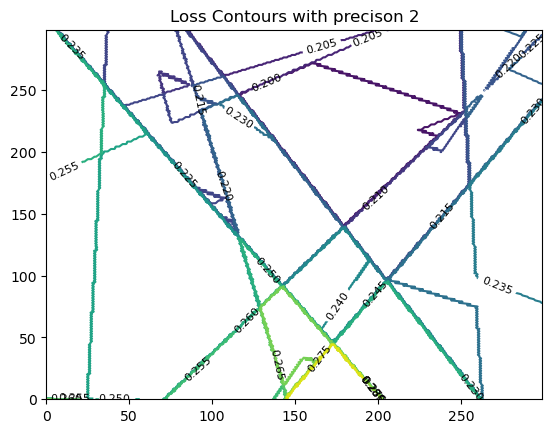

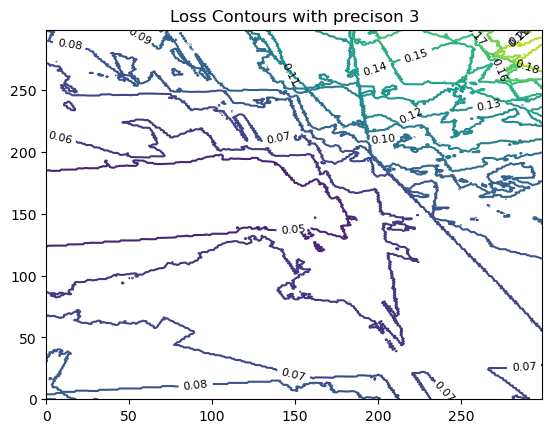

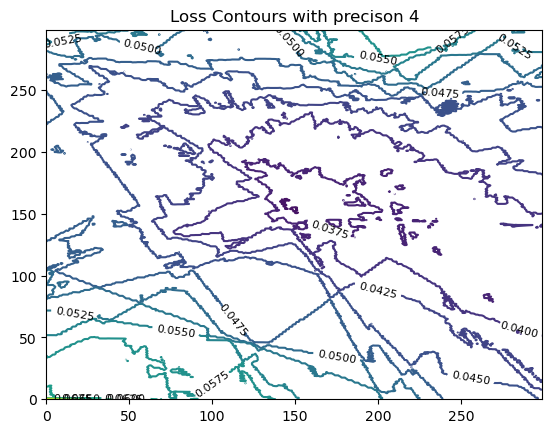

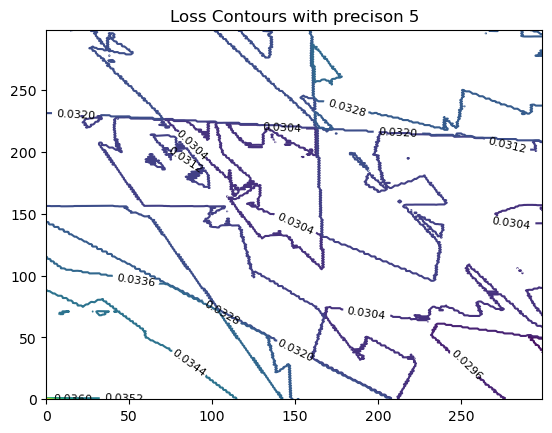

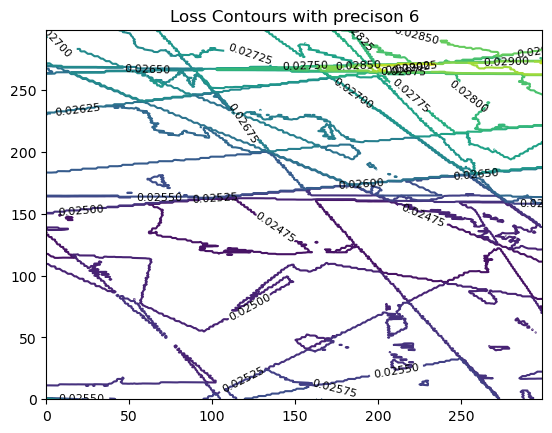

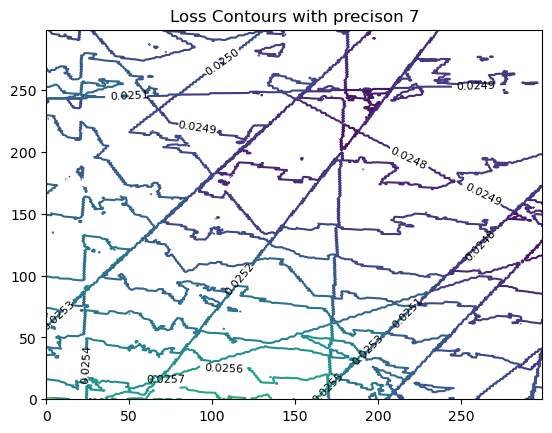

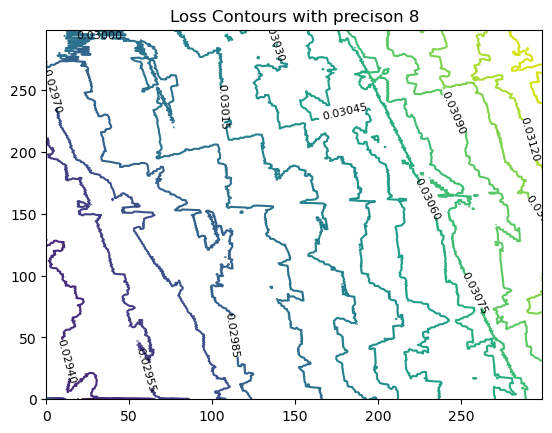

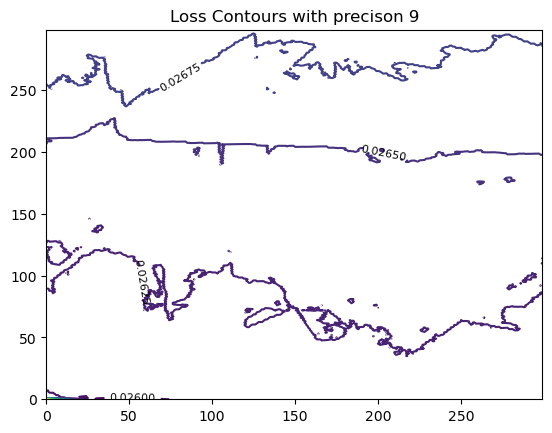

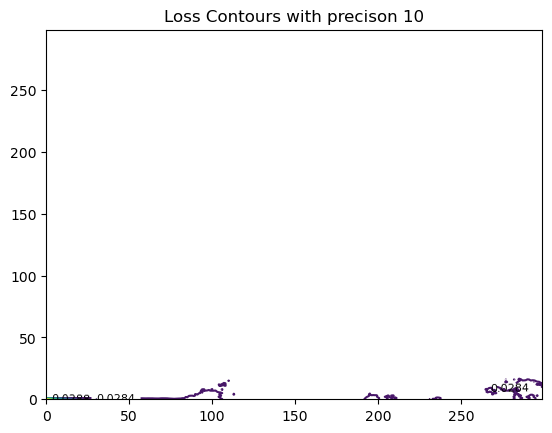

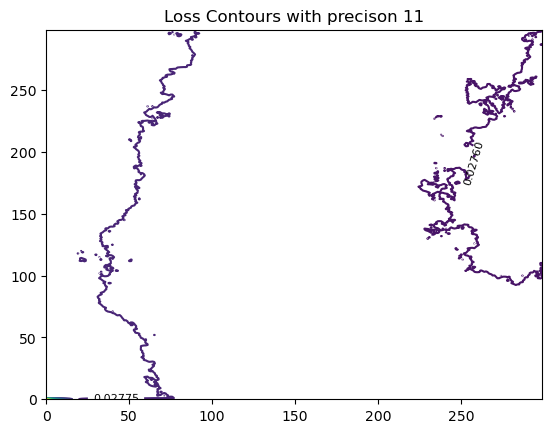

In [43]:
for p in precisions:
    data = get_econ_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, 'baseline', NORMALIZATION, STEPS, DISTANCE, aug_percentage=0.5)
    loss_data = data['points']
    # plot 2D
    plot = plt.contour(loss_data, levels=20)
    plt.clabel(plot, inline=True, fontsize=8, colors='black')
    plt.title(f'Loss Contours with precison {p}')
    plt.show()
    


/tmp/tbaldi/ipykernel_2858655/951369089.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


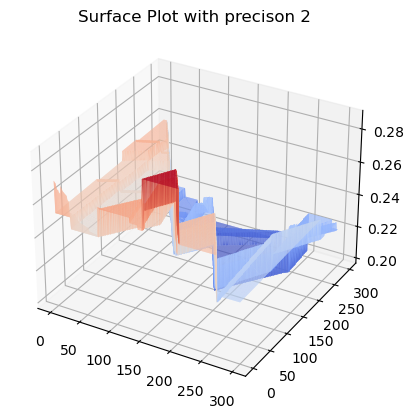

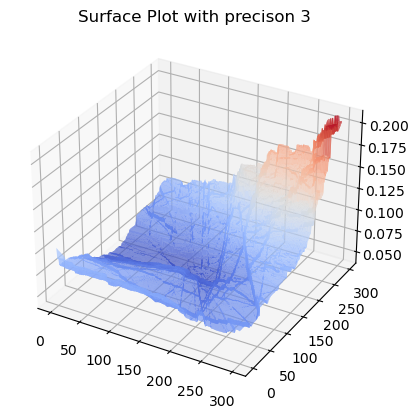

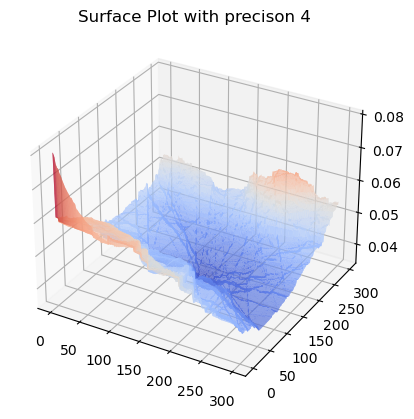

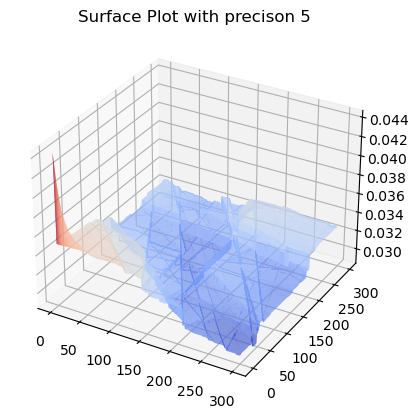

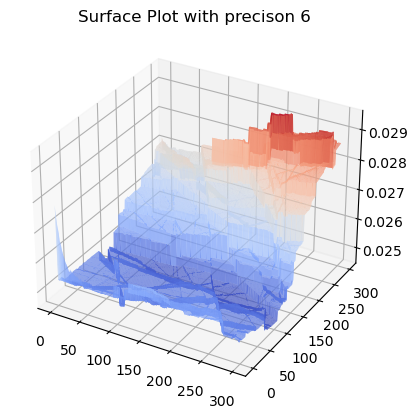

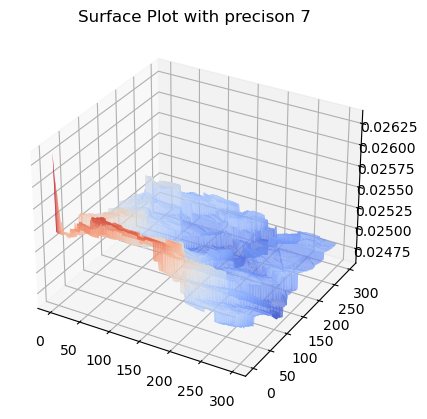

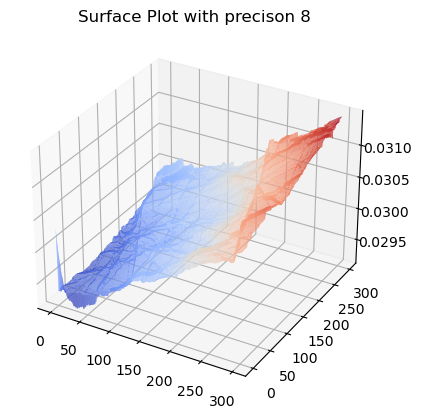

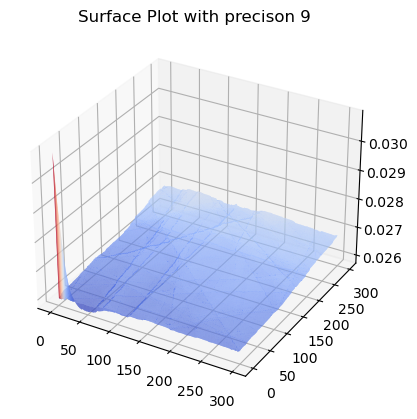

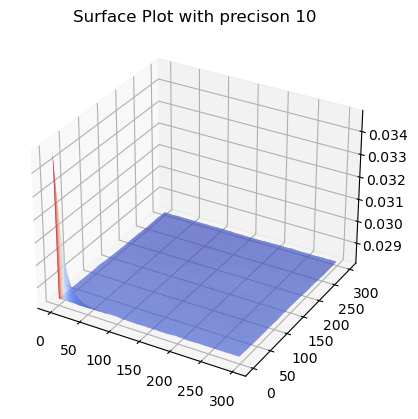

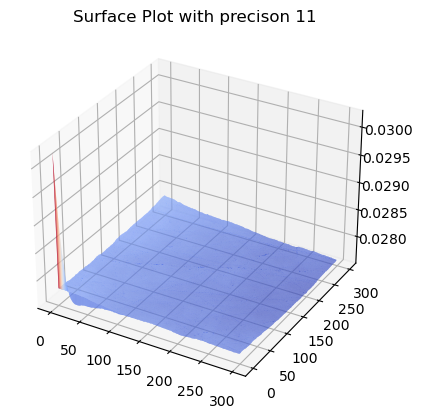

In [44]:
for p in precisions:
    data = get_econ_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, 'baseline', NORMALIZATION, STEPS, DISTANCE, aug_percentage=0.5)
    loss_data = data['points']    
    # #plot 3D
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    ax.plot_surface(X, Y, loss_data, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_title(f'Surface Plot with precison {p}')
    fig.show()

## RN08

In [45]:
BATCH_SIZE = 512
LEARNING_RATE = 0.0015625
NORMALIZATION = 'filter'
STEPS = 50
DISTANCE = 100
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [46]:
for p in precisions:
    data = get_rn08_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']
    # plot 2D
    plot = plt.contour(loss_data, levels=5)
    plt.clabel(plot, inline=True, fontsize=8, colors='black')
    plt.title(f'Loss Contours with precison {p}')
    plt.show()
    

/data/tbaldi/work/checkpoint/bs512_lr0.0015625/RN08_2b/plot_filter_50_100.pkl Not found!


TypeError: 'bool' object is not subscriptable

/data/tbaldi/work/checkpoint/bs1024_lr0.0015625/RN08_4b/plot_filter_50_100.pkl Not found!


/tmp/tbaldi/ipykernel_928336/842761857.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


TypeError: 'bool' object is not subscriptable

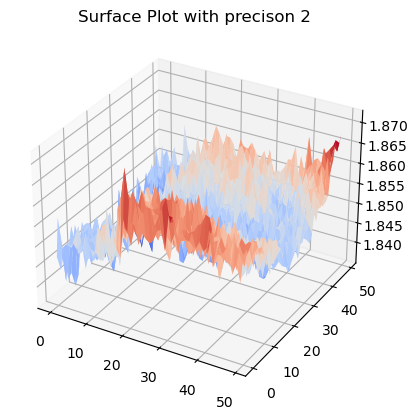

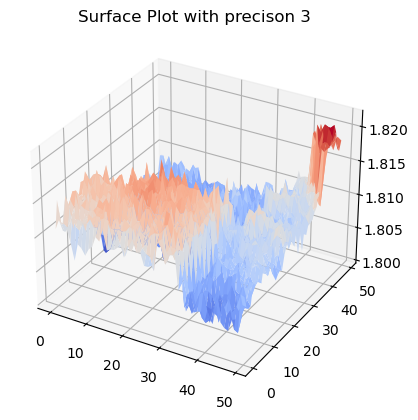

In [ ]:
for p in precisions:
    data = get_rn08_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']    
    # #plot 3D
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    ax.plot_surface(X, Y, loss_data, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_title(f'Surface Plot with precison {p}')
    fig.show()

# Features of the non-dominated solutions
We can see our task as Multi-Objective problems, indeed we have 3 objective function:

- we prefer models with higher accuracy;
- we prefer models with lower precision;
- we prefer models with higher robustness.

The idea is to evidence the non-dominated solutions of our analysis to check what are the characteristics of those kinds of models.

In [ ]:
dataset_df = dataset_df[(dataset_df['emd'] < 2) & (dataset_df['noise 5%'] < 3.5)]
df = dataset_df[['precision', 'emd', 'noise 5%']].copy()

### Efficiebt set of our grid search

In [ ]:
front = 0
while not df.empty:
    front += 1
    # compute non dominated solutions
    best_mask = paretoset(df, sense=['min', 'min', 'min'])
    ES_df = df[best_mask].copy()
    # update dataset
    dataset_df.loc[ES_df.index, "front"] = front
    # remove front from the population
    df = df.drop(ES_df.index)
    
FRONTS = 3

In [ ]:
dataset_df[dataset_df['front'] <= 1].head(10)

precision       emd  noise 5%  batch_size  learning_rate   avg_cka  \
62           3  1.428586  1.714786          32       0.001563  0.879041   
104          4  1.230677  1.675178          16       0.001563  0.950946   
117          4  1.243314  1.660596          64       0.003125  0.936417   
153          5  1.155972  1.649740          16       0.001563  0.902411   
160          5  1.151243  1.792468          32       0.001563  0.932709   
223          6  1.105781  2.092937         128       0.001563  0.738465   
228          6  1.147033  2.082024         256       0.006250  0.850636   
404         10  1.104643  3.295514          32       0.003125  0.652677   

     net_efficiency     trace  eigenvalue  front  
62         0.585544  4.477005    2.131615    1.0  
104        0.482084  4.693621    1.754795    1.0  
117        0.566857  4.638691    1.766435    1.0  
153        0.475019  4.469020    1.964603    1.0  
160        0.484760  5.184758    2.811941    1.0  
223        0.403178  5.536678    3.325435    1.0  
228        0.407676  5.304844    3.168468    1.0  
404        0.476849  6.575057    3.923268    1.0

### 2D plots

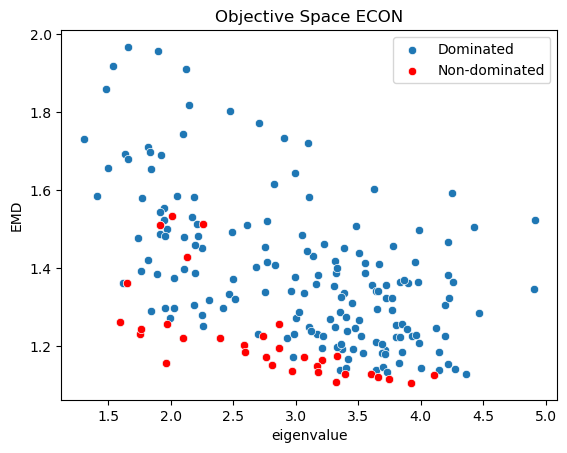

In [ ]:
dataset_df = dataset_df[dataset_df['eigenvalue'] > 0]
sns.scatterplot(x='eigenvalue', y='emd', data=dataset_df, label='Dominated')
sns.scatterplot(x='eigenvalue', y='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('eigenvalue')
plt.ylabel('EMD')
plt.title(f'Objective Space ECON')

# Display the plot
plt.legend()
plt.show()

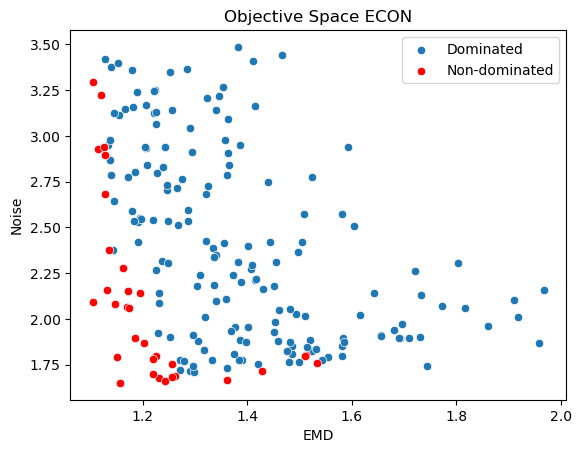

In [ ]:
sns.scatterplot(x='emd', y='noise 5%', data=dataset_df, label='Dominated')
sns.scatterplot(x='emd', y='noise 5%', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('EMD')
plt.ylabel('Noise')
plt.title(f'Objective Space ECON')

# Display the plot
plt.legend()
plt.show()

Let's try to plot them comparing the lerning rate with the neural efficiency due to their correlation.

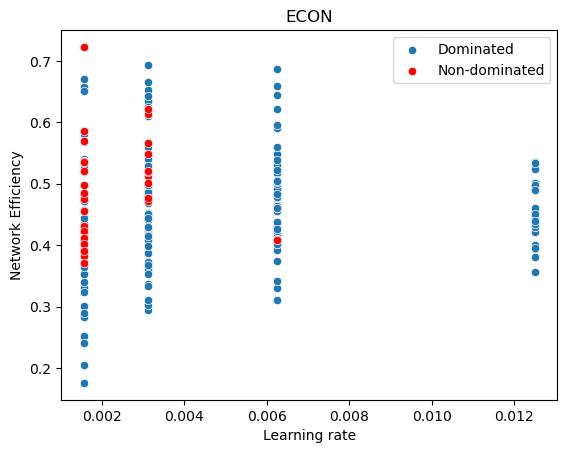

In [ ]:
sns.scatterplot(y='net_efficiency', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='net_efficiency', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Network Efficiency')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

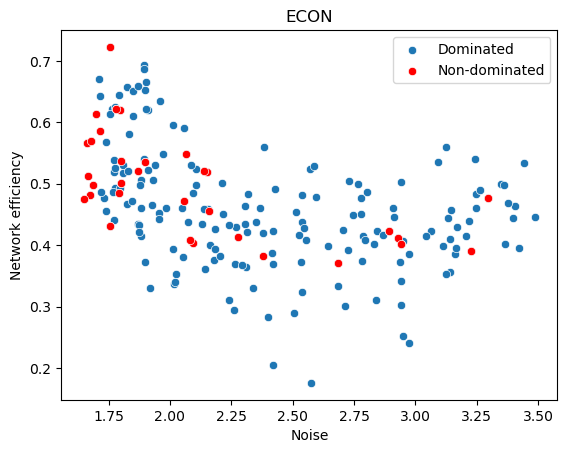

In [ ]:
sns.scatterplot(x='noise 5%', y='net_efficiency', data=dataset_df, label='Dominated')
sns.scatterplot(x='noise 5%', y='net_efficiency', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('Noise')
plt.ylabel('Network efficiency')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

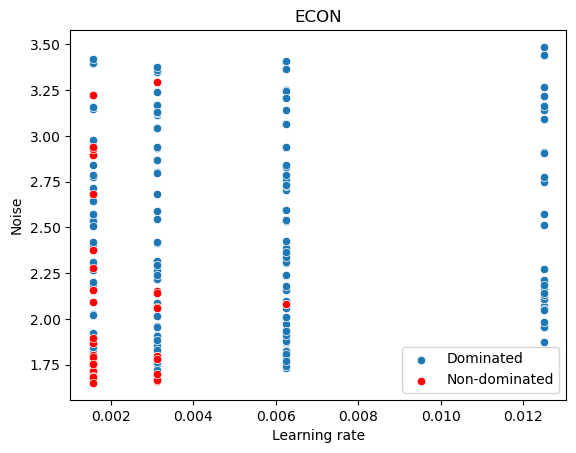

In [ ]:
sns.scatterplot(y='noise 5%', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='noise 5%', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Noise')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

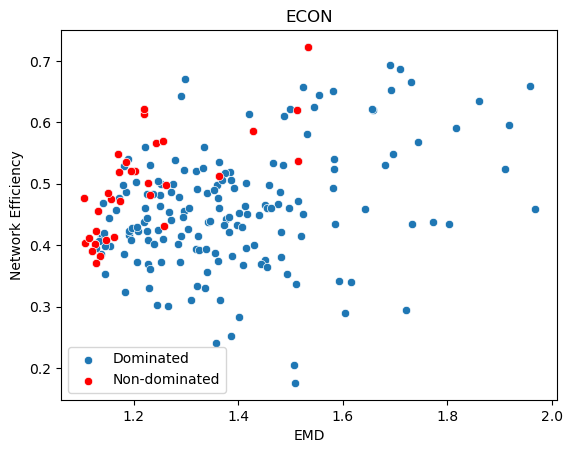

In [ ]:
sns.scatterplot(y='net_efficiency', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='net_efficiency', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Network Efficiency')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

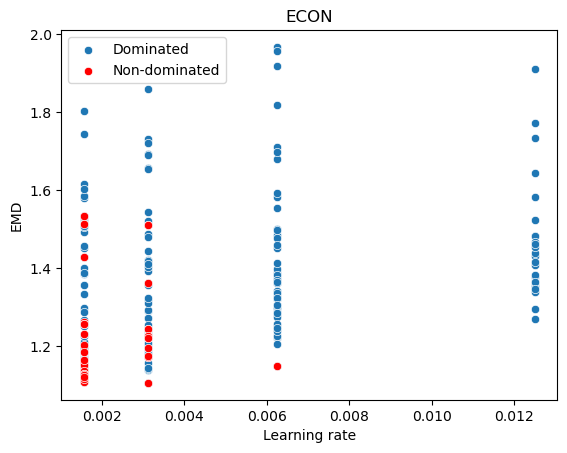

In [ ]:
sns.scatterplot(x='learning_rate', y='emd', data=dataset_df, label='Dominated')
sns.scatterplot(x='learning_rate', y='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('Learning rate')
plt.ylabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

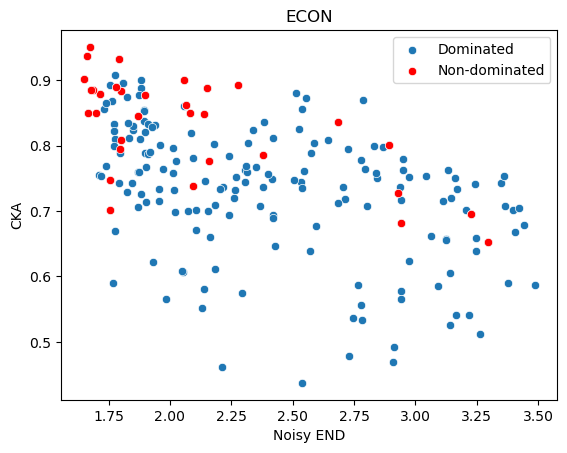

In [ ]:
sns.scatterplot(y='avg_cka', x='noise 5%', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='noise 5%', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('Noisy END')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

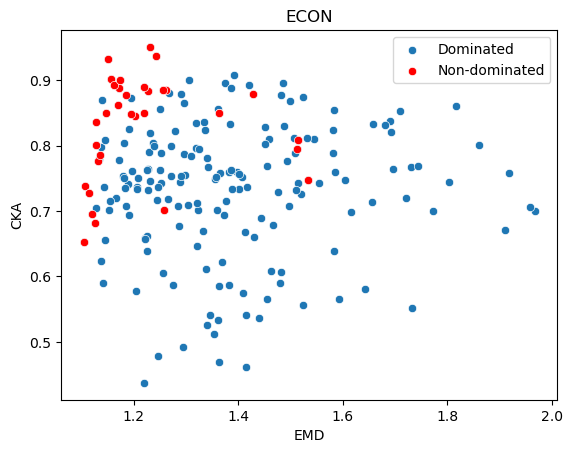

In [ ]:
sns.scatterplot(y='avg_cka', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

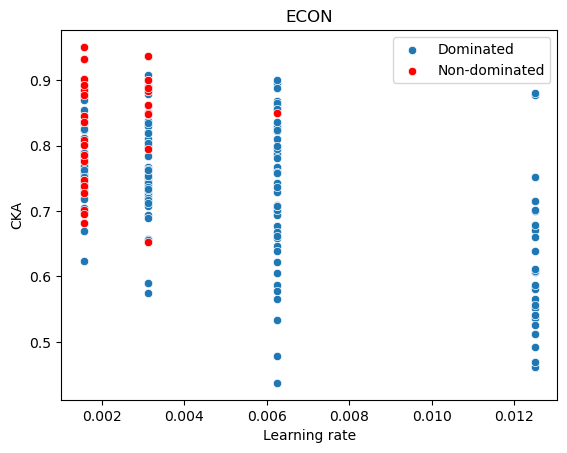

In [ ]:
sns.scatterplot(y='avg_cka', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

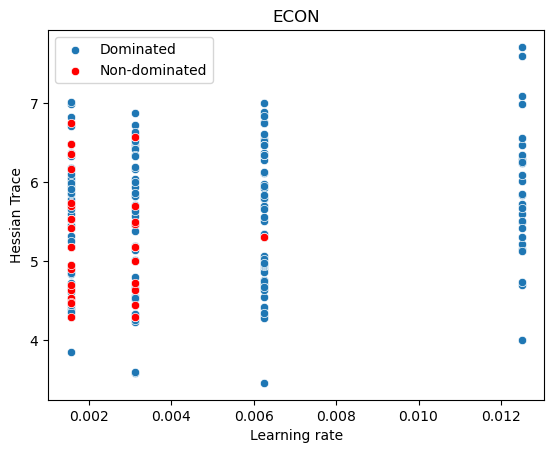

In [ ]:
sns.scatterplot(y='trace', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='trace', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Trace')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

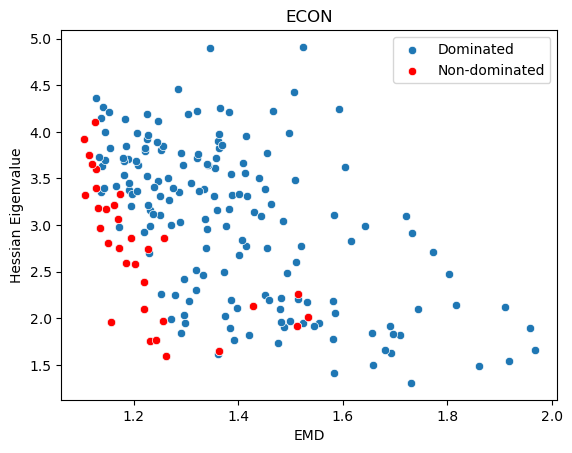

In [ ]:
sns.scatterplot(y='eigenvalue', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='eigenvalue', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Eigenvalue')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

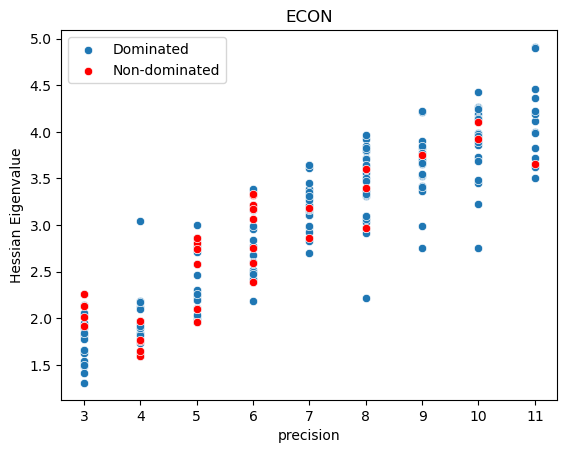

In [ ]:
sns.scatterplot(y='eigenvalue', x='precision', data=dataset_df, label='Dominated')
sns.scatterplot(y='eigenvalue', x='precision', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Eigenvalue')
plt.xlabel('precision')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

### 3D plots

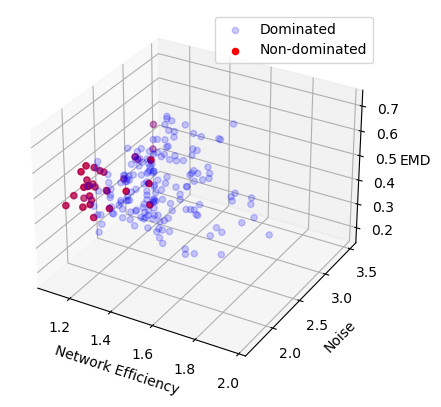

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['emd'], dataset_df['noise 5%'], dataset_df['net_efficiency'], c='blue', alpha=.2, label='Dominated')

# Highlight points based on index
highlight_df = dataset_df[dataset_df['front'] <= FRONTS]

ax.scatter(highlight_df['emd'], highlight_df['noise 5%'], highlight_df['net_efficiency'], c='red', label='Non-dominated')

# Set labels
ax.set_xlabel('Network Efficiency')
ax.set_zlabel('EMD')
ax.set_ylabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

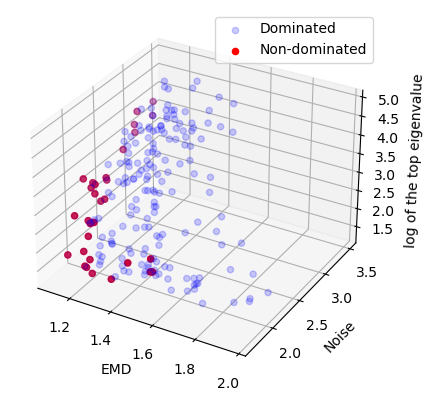

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['emd'], dataset_df['noise 5%'], dataset_df['eigenvalue'], c='blue', alpha=.2, label='Dominated')

# Highlight points based on index
highlight_df = dataset_df[dataset_df['front'] <= FRONTS]

ax.scatter(highlight_df['emd'], highlight_df['noise 5%'], highlight_df['eigenvalue'], c='red', label='Non-dominated')

# Set labels
ax.set_zlabel('log of the top eigenvalue')
ax.set_xlabel('EMD')
ax.set_ylabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

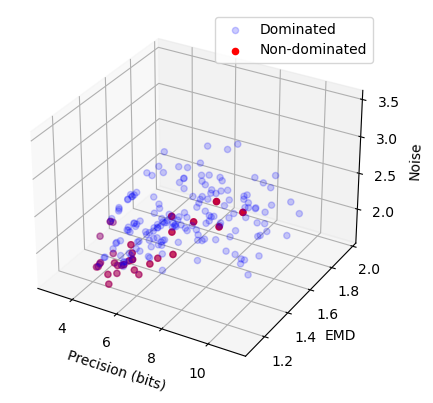

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['precision'], dataset_df['emd'], dataset_df['noise 5%'], c='blue', alpha=0.2, label='Dominated')

# Highlight points based on index
highlight_df = dataset_df[dataset_df['front'] <= FRONTS]
ax.scatter(highlight_df['precision'], highlight_df['emd'], highlight_df['noise 5%'], c='red', label='Non-dominated')

# Set labels
ax.set_ylabel('EMD')
ax.set_xlabel('Precision (bits)')
ax.set_zlabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

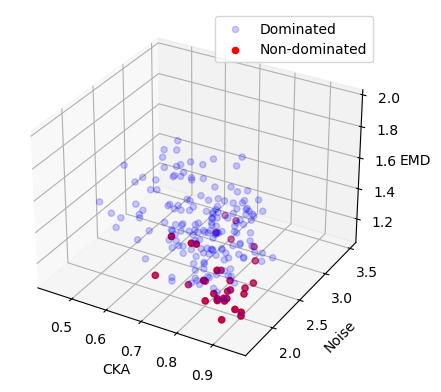

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['avg_cka'], dataset_df['noise 5%'], dataset_df['emd'], c='blue', alpha=0.2, label='Dominated')

# Highlight points based on index
highlight_df = dataset_df[dataset_df['front'] <= FRONTS]
ax.scatter(highlight_df['avg_cka'], highlight_df['noise 5%'], highlight_df['emd'], c='red', label='Non-dominated')

# Set labels
ax.set_xlabel('CKA')
ax.set_zlabel('EMD')
ax.set_ylabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
dataset_df[dataset_df['front'] == 1]

precision       emd  noise 5%  batch_size  learning_rate   avg_cka  \
62           3  1.428586  1.714786          32       0.001563  0.879041   
104          4  1.230677  1.675178          16       0.001563  0.950946   
117          4  1.243314  1.660596          64       0.003125  0.936417   
153          5  1.155972  1.649740          16       0.001563  0.902411   
160          5  1.151243  1.792468          32       0.001563  0.932709   
223          6  1.105781  2.092937         128       0.001563  0.738465   
228          6  1.147033  2.082024         256       0.006250  0.850636   
404         10  1.104643  3.295514          32       0.003125  0.652677   

     net_efficiency     trace  eigenvalue  front  
62         0.585544  4.477005    2.131615    1.0  
104        0.482084  4.693621    1.754795    1.0  
117        0.566857  4.638691    1.766435    1.0  
153        0.475019  4.469020    1.964603    1.0  
160        0.484760  5.184758    2.811941    1.0  
223        0.403178  5.536678    3.325435    1.0  
228        0.407676  5.304844    3.168468    1.0  
404        0.476849  6.575057    3.923268    1.0